# LDA Iris Demo

Notebook from [Eric Elmoznino](https://github.com/EricElmoznino/lighthouse_dimensionality_reduction_tutorial).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
sns.set(style='whitegrid', context='talk')

In [2]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

target_names = iris.target_names
feature_names = ['sepal length in cm', 
                 'sepal width in cm', 
                 'petal length in cm', 
                 'petal width in cm']

In [12]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
df = pd.DataFrame(X, columns=feature_names)
df['class'] = target_names[y]

In [11]:
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
target_names[y]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

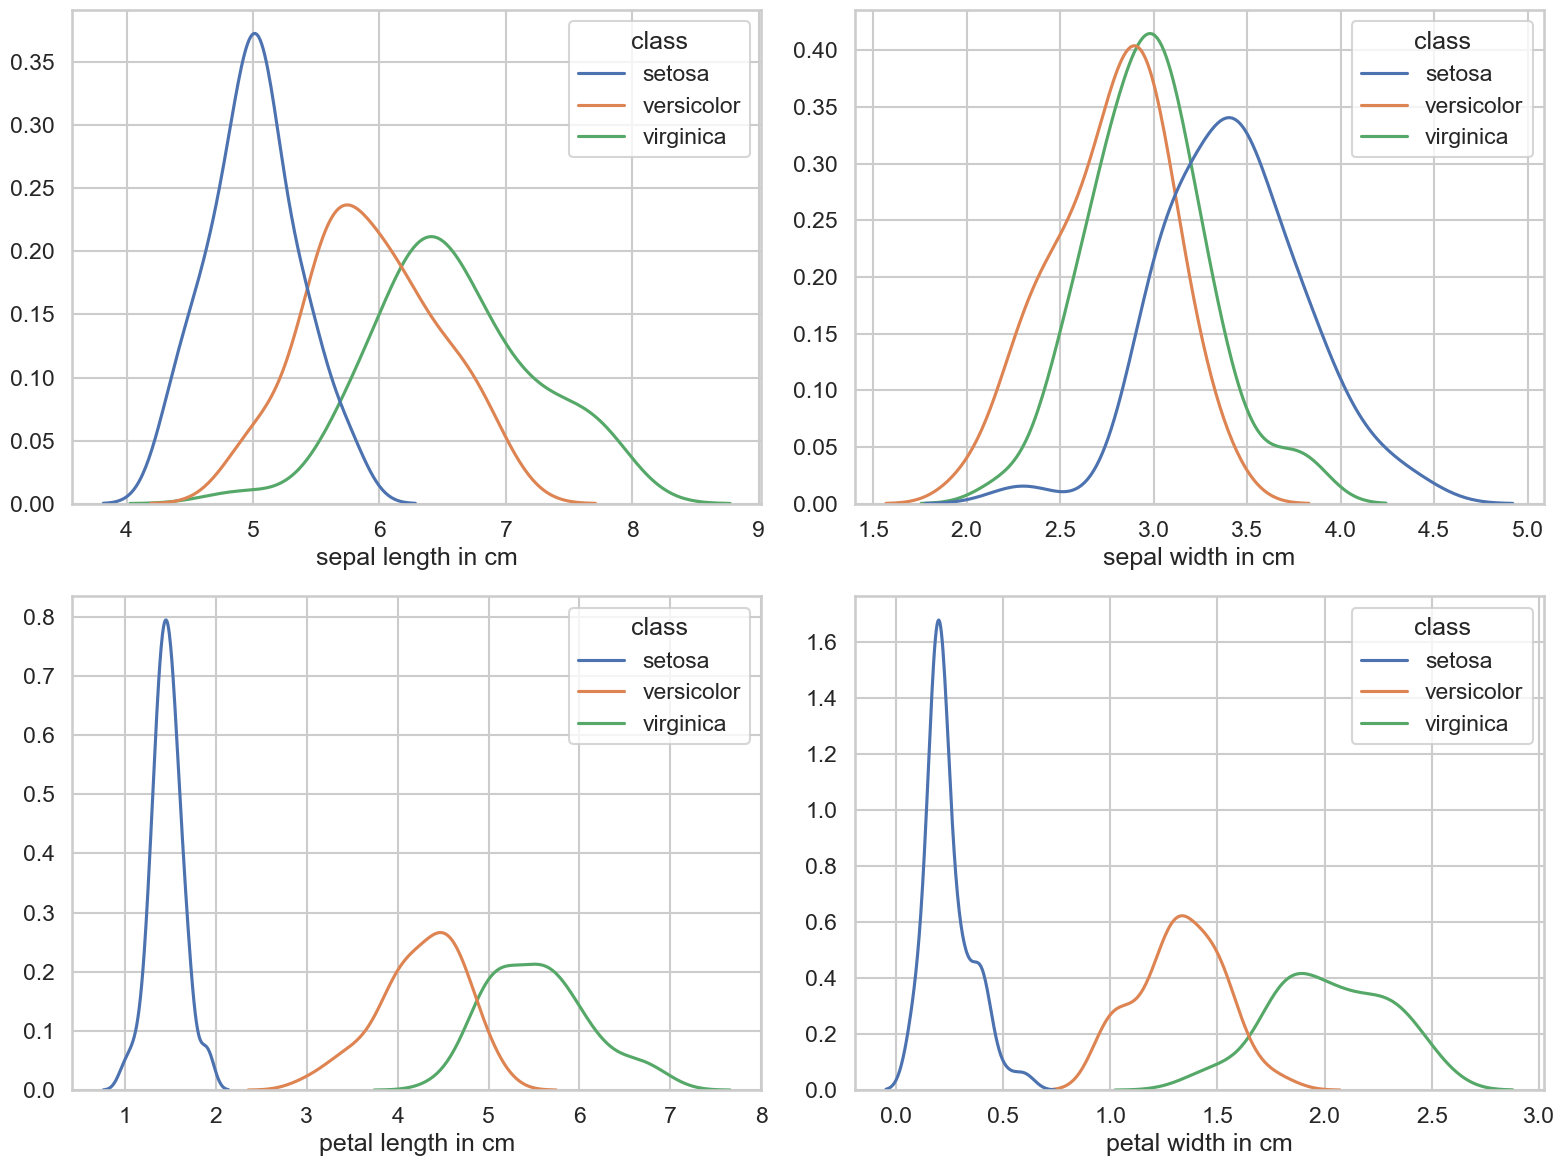

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
for i in range(2):
    for j in range(2):
        sns.kdeplot(hue='class', x=feature_names[i*2 + j], data=df, ax=axs[i, j])
        axs[i, j].set_ylabel('')

fig.tight_layout()

In [5]:
#Perform LDA
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X, y)
X_reduced = lda.transform(X)

In [6]:
lda_feature_names = ['LDA dim=1', 'LDA dim=2']

df_reduced = pd.DataFrame(X_reduced, columns=lda_feature_names)
df_reduced['class'] = target_names[y]

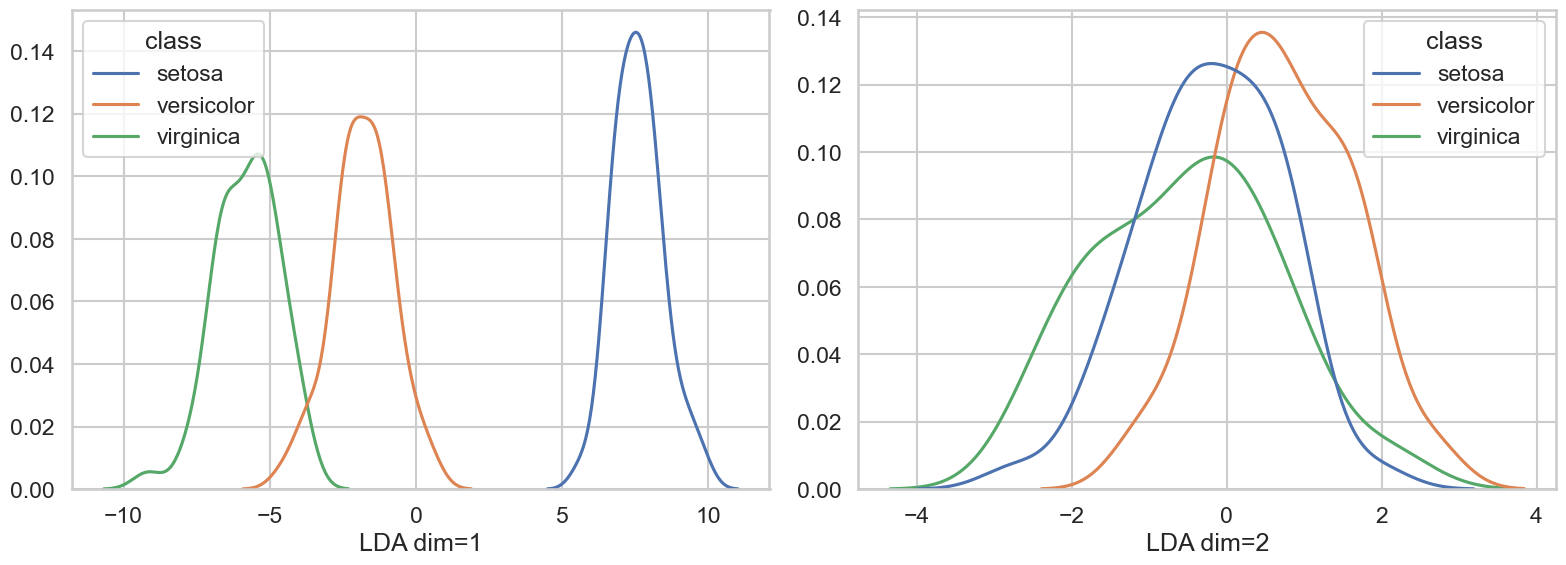

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
for i in range(2):
    sns.kdeplot(hue='class', x=lda_feature_names[i], data=df_reduced, ax=axs[i])
    axs[i].set_ylabel('')
        
fig.tight_layout()

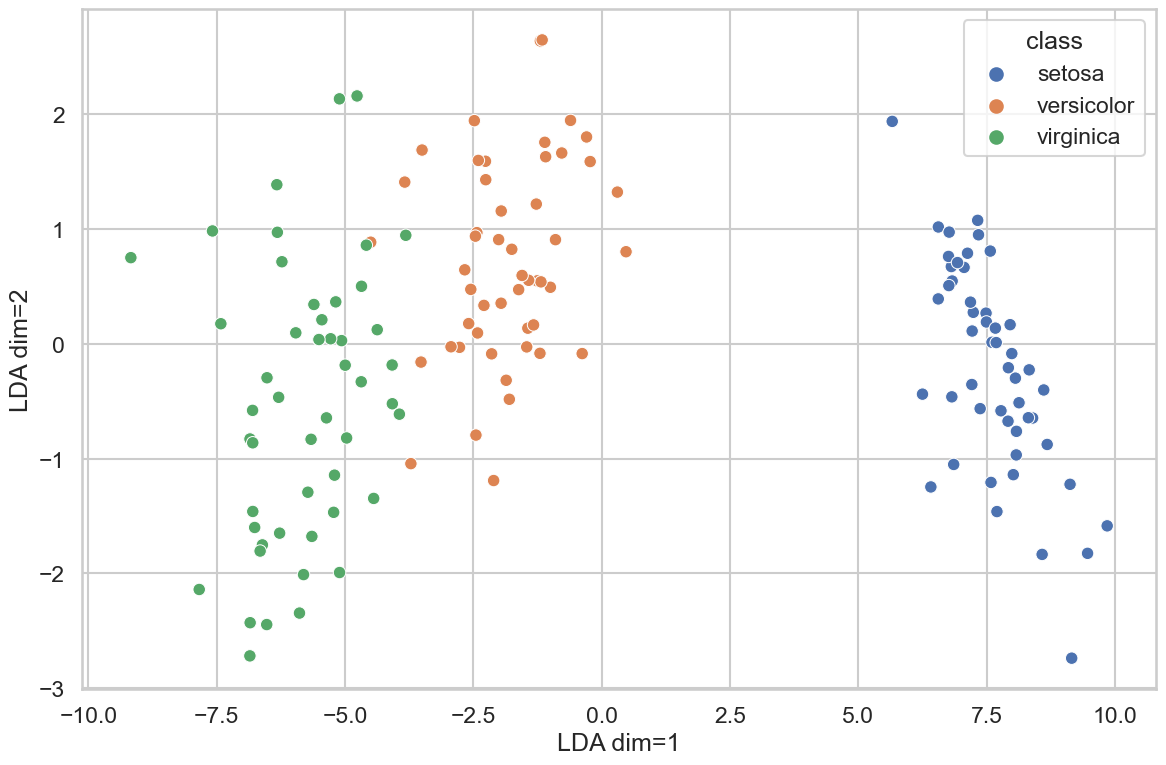

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x=lda_feature_names[0], y=lda_feature_names[1], hue='class', data=df_reduced, ax=ax)

fig.tight_layout()